In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
data = pd.read_csv("../data_page1.csv")

In [33]:
data.head()

,región,year,specie,carne,poblacion,produccion,rendimiento
0,Tumbes,2024,ave,262.910574,183726.0,93692.0,2.806108
1,Piura,2024,ave,31027.129806,3987073.0,13984015.0,2.218757
2,Lambayeque,2024,ave,25241.836631,2510903.0,11388007.0,2.216528
3,La Libertad,2024,ave,305189.102963,25756805.0,138011041.0,2.211338
4,Cajamarca,2024,ave,3438.308384,899534.0,1551093.0,2.216700


In [57]:
df = data[data.región=="Cajamarca"].drop(columns=["región", "specie"]).groupby(by="year").mean()

In [58]:
df

,carne,poblacion,produccion,rendimiento
year,,,,
2017,5465.357536,334036.250123,331934.938811,27.536662
2018,5032.310193,345171.857143,320333.178431,27.100680
2019,5188.142857,343314.000000,320730.000000,27.542671
2020,4637.687934,346351.285714,306286.610015,28.549525
2021,4991.904311,347525.000000,309033.861921,28.230284
2022,4916.327143,345106.857143,302254.000000,28.095795
2023,4688.629671,346722.571429,285826.557251,28.676746
2024,4642.366239,348899.714286,278754.000000,28.441508


In [59]:
df['Time'] = np.arange(len(df.index))

In [60]:
df['carne_lag'] = df['carne'].shift(1)
#df = df.reindex(columns=['carne', 'carne_lag'])
df

,carne,poblacion,produccion,rendimiento,Time,carne_lag
year,,,,,,
2017,5465.357536,334036.250123,331934.938811,27.536662,0,NaN
2018,5032.310193,345171.857143,320333.178431,27.100680,1,5465.357536
2019,5188.142857,343314.000000,320730.000000,27.542671,2,5032.310193
2020,4637.687934,346351.285714,306286.610015,28.549525,3,5188.142857
2021,4991.904311,347525.000000,309033.861921,28.230284,4,4637.687934
2022,4916.327143,345106.857143,302254.000000,28.095795,5,4991.904311
2023,4688.629671,346722.571429,285826.557251,28.676746,6,4916.327143
2024,4642.366239,348899.714286,278754.000000,28.441508,7,4688.629671


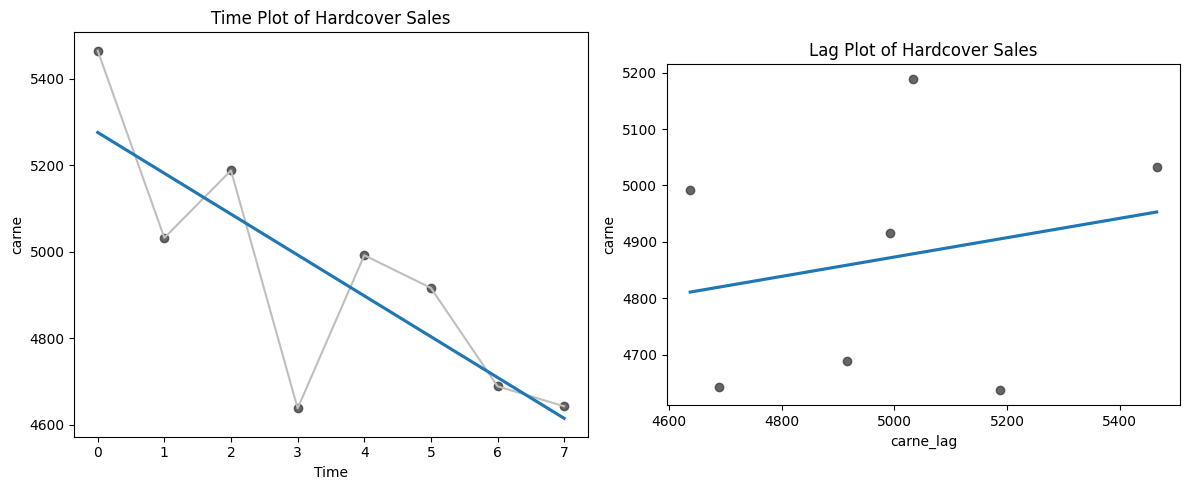

In [61]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# ---- First plot ----
ax[0].plot('Time', 'carne', data=df, color='0.75')
sns.regplot(x='Time', y='carne', data=df, ci=None, scatter_kws=dict(color='0.25'), ax=ax[0])
ax[0].set_title('Time Plot of Hardcover Sales')

# ---- Second plot ----
sns.regplot(x='carne_lag', y='carne', data=df, ci=None, scatter_kws=dict(color='0.25'), ax=ax[1])
ax[1].set_aspect('equal')
ax[1].set_title('Lag Plot of Hardcover Sales')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler()),        # ⬅️ Normalización aquí
    ("ridge", Ridge())
])

param_grid = {
    "poly__degree": [1, 2, 3, 4, 5, 10, 20],   # diferentes órdenes del polinomio
    "ridge__alpha": [0.01, 0.1, 1, 10, 100],   # fuerza de la regularización
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid.fit(X, y)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor score:", grid.best_score_)
